# Applied Data Science Capstone: The Battle of the Neighborhoods

## _Table of Contents_
- Introduction
- Data
- Methodology
- Results
- Discussion
- Conclusion

## _I. Introduction_

### 1.1 The background:
Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world.

Toronto is the provincial capital of Ontario, and the most crowded city in Canada. The estimated population of Toronto in 2019 is 3,041,200. 

The city proper has expanded past its original borders through both annexation and amalgamation to its current area of 630.2 km2 (243.3 sq mi). 

The diverse population of Toronto reflects its current and historical role as an important destination for immigrants to Canada.

### 1.2 The problem:
Mr.X recently accpeted a job in Downtown Toronto. He and his family will move to Toronto very soon. Mr.X would like to determine where to live since he is not familiar with Downtown Toronto. Ideally, this place is located in a neighborhood with great amenities, for example,  there are restaurants, grocery markets, pharmacies, and parks. Also, Mr.X would prefer not to drive to and from work.

### 1.2 The question:
Where will be the optimal location for Mr.X's new residence which satisfy all his preferences?

### 1.3 The objective:
This report is aim at analyzing the neighborhoods metrics of Toronto, grouping the neighborhoods into similar clusters, enumerating the neighborhoods which satisfy certain criterias, and finally gathering meaningful insights about Toronto neighborhoods.

### 1.4 The target audience:
There are two main types of target audience of this report: 

1) the first category is people who are interested in relocating to Toronto and not familiar with the Toronto neighborhoods; 

2) the second category is people who would like to move to a neighborhood in Toronto with greater and more convinient amenities than the ones they live in right now.

## _II. Data Description_

### To answer the above question, I would like to examine data from these following data sources:
1) to obatain data about the Toronto neighborhoods and boroughs: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

2) to obtain data about the Toronto neighborhoods' geographical coordinates: http://cocl.us/Geospatial_data

3) to obtain venues which contain numbers, types, and locations in Toronto: Foursquare API

4) to obtain coordinates of specific locations: Google Maps API

### 2.1 Toronto neighborhoods and boroughs data:

From this Wikipedia page(https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M), I'll scrape information about Toronto neighborhoods and boroughs.

Some of the features that can be extracted from this data source are: postal codes, borough names, and neighborhood names of the city of Toronto.


### 2.2 Toronto neighborhoods' geographical data:

From the Geocoder Python package(https://geocoder.readthedocs.io/index.html), I'll extract the geographical information about each neighborhood in Toronto.

Some of the features that can be extracted from this data source are: latitudes, longitutes,  and postal codes of each neighborhood in Toronto.

### 2.3 Foursquare API and Google Maps API

1) I will use the Fouorsquare Places API to extract diverse information about venues in these neighborhoods in Toronto. Some details about these venues will be locations, latitudes, longitutes, categories, etc. Additionally, I will use Foursquare to build segments for analysis and measurement.

2) I will use the Google Maps API to get the specific geographic coordinates of a particular location. For example, I will use this API to make requests to get the exact latitude and longitudes of Toronto in order to make the map.

### 2.4 Other techniques I will use:
1) matplotlib and folium to generate a visualization map

2) unsupervised k-mean algorithm to cluster neighborhoods based on similarity

## _III. Methodology_

### 3.1 scrape data of Toronto neighborhods and boroughs

In [1]:
import pandas as pd
import numpy as np

In [2]:
# scrape data from wiki, transform data into a dataframe
l = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
df = l[0]
df.head(10)

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
8,M8A,Not assigned,Not assigned
9,M9A,Queen's Park,Not assigned


In [3]:
# for valid analysis purpose, drop rows where borough value is 'Not assigned'
df = df[df['Borough'] != 'Not assigned']
df.head(10)

,Postcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
9,M9A,Queen's Park,Not assigned
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North


In [4]:
# change the neighborhood to be the same as borough if neighborhood value is not assigned
df.Neighborhood = df.Borough.where(df.Neighborhood == 'Not assigned', df.Neighborhood)
df.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Postcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
9,M9A,Queen's Park,Queen's Park
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North


In [5]:
# merge neighborhoods with same postal code
df = df.groupby(['Postcode','Borough'], sort = False).agg(lambda x: ",".join(x)).reset_index()
df.head(10)

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Heights,Lawrence Manor"
4,M7A,Downtown Toronto,Queen's Park
5,M9A,Queen's Park,Queen's Park
6,M1B,Scarborough,"Rouge,Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens,Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson,Garden District"


### 3.2 scrape data of Toronto neighborhoods' geographical coordinates

In [6]:
# scrape data from Geocoder Python Package
df1 = pd.read_csv('http://cocl.us/Geospatial_data')
df1.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [7]:
# merge df1(geo-data) with df(neighborhood-data)
df = pd.merge(left=df,right=df1, left_on='Postcode', right_on='Postal Code')
df.head(10)

,Postcode,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,M5A,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights,Lawrence Manor",M6A,43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,M7A,43.662301,-79.389494
5,M9A,Queen's Park,Queen's Park,M9A,43.667856,-79.532242
6,M1B,Scarborough,"Rouge,Malvern",M1B,43.806686,-79.194353
7,M3B,North York,Don Mills North,M3B,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens,Parkview Hill",M4B,43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson,Garden District",M5B,43.657162,-79.378937


### 3.2 generate a map of Toronto with neighborhood data on it

In [8]:
import matplotlib as mpl
from sklearn.cluster import KMeans
import json
from pandas.io.json import json_normalize

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests

!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [9]:
# create a dataframe with only boroughs contain the word Toronto
df2 = df[df['Borough'].str.contains('Toronto')].reset_index(drop=True)


print('The dataframe has {} boroughs and {} neighborhoods.'.format(len(df2['Borough'].unique()),df2.shape[0]))

The dataframe has 4 boroughs and 39 neighborhoods.


In [10]:
# use geo library to get latitude and longitude values of Toronto
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [11]:
# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df2['Latitude'], df2['Longitude'], df2['Borough'], df2['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

### Note: the generated map cannot be seen on Github, therefore, I've attached the screenshot of this map in the following cell.

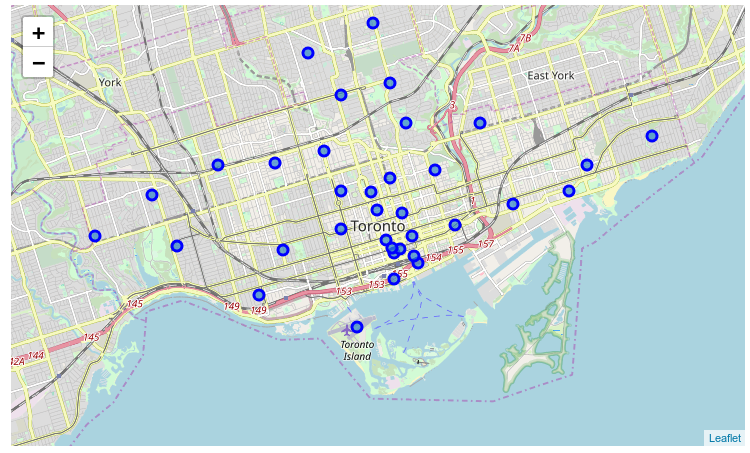

### 3.3 utilize Foursquare API to explore the neighborhoods

In [12]:
CLIENT_ID = 'ZNSID3JACAT4524JYYIWEF3UYOAGQ1CJFGKOQVFGWTXPK1L3'
CLIENT_SECRET = '5E0LASVEW5N50XVEP4MKU0FN4YZ5LYKFVPITQDJBIYG1H4S1'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZNSID3JACAT4524JYYIWEF3UYOAGQ1CJFGKOQVFGWTXPK1L3
CLIENT_SECRET:5E0LASVEW5N50XVEP4MKU0FN4YZ5LYKFVPITQDJBIYG1H4S1


In [13]:
# explore the first neighborhood in Toronto
df2.loc[0, 'Neighborhood']

'Harbourfront'

In [14]:
# get Harbourfront's latitude and longitude values

neighbor_latitude = df2.loc[0, 'Latitude']
neighbor_longitude = df2.loc[0, 'Longitude']

neighbor_name = df2.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbor_name, neighbor_latitude, neighbor_longitude))

Latitude and longitude values of Harbourfront are 43.6542599, -79.3606359.


In [15]:
# get the top 100 venues in this neighborhood within 500 meters
limit = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbor_latitude, 
    neighbor_longitude, 
    radius, 
    limit)

In [16]:
results = requests.get(url).json()

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
# clean JSON and structure it into a dataframe
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Gym / Fitness Center,43.653191,-79.357947
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,Impact Kitchen,Restaurant,43.656369,-79.356980
5,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149
6,Dominion Pub and Kitchen,Pub,43.656919,-79.358967
7,Corktown Common,Park,43.655618,-79.356211
8,The Distillery Historic District,Historic Site,43.650244,-79.359323
9,Figs Breakfast & Lunch,Breakfast Spot,43.655675,-79.364503


In [19]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

45 venues were returned by Foursquare.


In [20]:
# create a function for repeating the above process for all neighborhoods in Toronto

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
# run above code on each neighborhood and create a new dataframe called *dtt_venues*.

dtt_venues = getNearbyVenues(names=df2['Neighborhood'],
                             latitudes=df2['Latitude'],
                             longitudes=df2['Longitude'])

Harbourfront
Queen's Park
Ryerson,Garden District
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Adelaide,King,Richmond
Dovercourt Village,Dufferin
Harbourfront East,Toronto Islands,Union Station
Little Portugal,Trinity
The Danforth West,Riverdale
Design Exchange,Toronto Dominion Centre
Brockton,Exhibition Place,Parkdale Village
The Beaches West,India Bazaar
Commerce Court,Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North,Forest Hill West
High Park,The Junction South
North Toronto West
The Annex,North Midtown,Yorkville
Parkdale,Roncesvalles
Davisville
Harbord,University of Toronto
Runnymede,Swansea
Moore Park,Summerhill East
Chinatown,Grange Park,Kensington Market
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown,St. James Town
First Canadian Place,Underground city

In [22]:
# Venues were returned for each neighborhood
dtt_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide,King,Richmond",100,100,100,100,100,100
Berczy Park,55,55,55,55,55,55
"Brockton,Exhibition Place,Parkdale Village",22,22,22,22,22,22
Business Reply Mail Processing Centre 969 Eastern,15,15,15,15,15,15
"CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara",15,15,15,15,15,15
"Cabbagetown,St. James Town",45,45,45,45,45,45
Central Bay Street,84,84,84,84,84,84
"Chinatown,Grange Park,Kensington Market",90,90,90,90,90,90
Christie,17,17,17,17,17,17


In [23]:
# unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(dtt_venues['Venue Category'].unique())))

There are 236 uniques categories.


### 3.4 analyze each neighborhood in Toronto using One Hot Encoding, use the neighborhood to group data, and then find out the top ten vanues for each neighborhood

In [24]:
# one hot encoding
dtt_onehot = pd.get_dummies(dtt_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dtt_onehot['Neighborhood'] = dtt_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dtt_onehot.columns[-1]] + list(dtt_onehot.columns[:-1])
dtt_onehot = dtt_onehot[fixed_columns]

dtt_onehot.head(10)

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# group neighborhood
dtt_grouped = dtt_onehot.groupby('Neighborhood').mean().reset_index()
dtt_grouped.head(10)

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,"Adelaide,King,Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.0,0.0,0.0,0.0,0.020000,0.0,0.000000,0.010000,0.000000,0.01
1,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.018182,0.0,0.000000,0.000000,0.000000,0.00
2,"Brockton,Exhibition Place,Parkdale Village",0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00
3,Business Reply Mail Processing Centre 969 Eastern,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.000000,0.000000,0.066667,0.066667,0.066667,0.133333,0.133333,0.133333,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00
5,"Cabbagetown,St. James Town",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00
6,Central Bay Street,0.011905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011905,...,0.0,0.0,0.0,0.0,0.011905,0.0,0.000000,0.011905,0.000000,0.00
7,"Chinatown,Grange Park,Kensington Market",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.055556,0.0,0.055556,0.011111,0.000000,0.00
8,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00
9,Church and Wellesley,0.023810,0.011905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011905,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.011905,0.000000,0.011905,0.00


In [26]:
# print each neighborhood along with top 5 common venues
num_top_venues = 5

for hood in dtt_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = dtt_grouped[dtt_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))

----Adelaide,King,Richmond----
         venue  freq
0  Coffee Shop  0.08
1         Café  0.04
2   Steakhouse  0.04
3          Bar  0.04
4        Hotel  0.03
----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2  Seafood Restaurant  0.04
3         Cheese Shop  0.04
4          Steakhouse  0.04
----Brockton,Exhibition Place,Parkdale Village----
                venue  freq
0                Café  0.14
1      Breakfast Spot  0.09
2         Coffee Shop  0.09
3  Italian Restaurant  0.05
4           Pet Store  0.05
----Business Reply Mail Processing Centre 969 Eastern----
              venue  freq
0        Comic Shop  0.07
1     Garden Center  0.07
2       Pizza Place  0.07
3  Recording Studio  0.07
4        Restaurant  0.07
----CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara----
              venue  freq
0    Airport Lounge  0.13
1   Airport Service  0.13
2  Airport Terminal  0.13
3   Harbo

In [27]:
# create a function to sort venues in decending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
# create a dataframe contains the top 10 venues for each neighborhood in Toronto
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
dtt_venues_sorted = pd.DataFrame(columns=columns)
dtt_venues_sorted['Neighborhood'] = dtt_grouped['Neighborhood']

for ind in np.arange(dtt_grouped.shape[0]):
    dtt_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dtt_grouped.iloc[ind, :], num_top_venues)

dtt_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Bar,Steakhouse,Burger Joint,Sushi Restaurant,Hotel,Thai Restaurant,Asian Restaurant,Pizza Place
1,Berczy Park,Coffee Shop,Cocktail Bar,Steakhouse,Cheese Shop,Café,Farmers Market,Beer Bar,Bakery,Seafood Restaurant,Gourmet Shop
2,"Brockton,Exhibition Place,Parkdale Village",Café,Coffee Shop,Breakfast Spot,Yoga Studio,Bakery,Gym,Furniture / Home Store,Intersection,Italian Restaurant,Convenience Store
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Pizza Place,Smoke Shop,Brewery,Spa,Farmers Market,Fast Food Restaurant,Burrito Place,Restaurant,Recording Studio
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Terminal,Airport Lounge,Airport Service,Harbor / Marina,Rental Car Location,Sculpture Garden,Boat or Ferry,Bar,Boutique,Airport
5,"Cabbagetown,St. James Town",Coffee Shop,Italian Restaurant,Café,Bakery,Park,Pizza Place,Pub,Restaurant,Liquor Store,Playground
6,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Japanese Restaurant,Ice Cream Shop,Burger Joint,Sandwich Place,Salad Place,Gym / Fitness Center,Juice Bar
7,"Chinatown,Grange Park,Kensington Market",Café,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Coffee Shop,Chinese Restaurant,Bar,Bakery,Mexican Restaurant,Noodle House
8,Christie,Grocery Store,Café,Park,Nightclub,Restaurant,Diner,Baby Store,Athletics & Sports,Italian Restaurant,Candy Store
9,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Yoga Studio,Men's Store,Pizza Place,Café,Burger Joint


## _IV. Results_

### 5.1 use the unsupervised learning K-means algorithm to cluster the neighborhoods

#### use a k_cluster value of 6 to split the neighborhoods into 6 different clusters based on the similarity they have concerning the venues they contain

In [46]:
# set number of clusters
kclusters = 6

dtt_grouped_clustering = dtt_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dtt_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 5, 0, 0, 0, 0, 0], dtype=int32)

### 5.2 create a dataframe includes the cluster and the top 10 venues for each neighborhood

In [48]:
# add clustering labels
#dtt_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
dtt_merged = df2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dtt_merged = dtt_merged.join(dtt_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

dtt_merged.head()

,Postcode,Borough,Neighborhood,Postal Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,Harbourfront,M5A,43.654260,-79.360636,0,Coffee Shop,Bakery,Park,Pub,Breakfast Spot,Café,Mexican Restaurant,Farmers Market,Electronics Store,Brewery
1,M7A,Downtown Toronto,Queen's Park,M7A,43.662301,-79.389494,0,Coffee Shop,Park,Gym,Smoothie Shop,Sandwich Place,Burger Joint,Burrito Place,Restaurant,Café,Portuguese Restaurant
2,M5B,Downtown Toronto,"Ryerson,Garden District",M5B,43.657162,-79.378937,0,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Middle Eastern Restaurant,Ramen Restaurant,Bookstore,Bakery,Diner,Plaza
3,M5C,Downtown Toronto,St. James Town,M5C,43.651494,-79.375418,0,Café,Coffee Shop,Restaurant,Hotel,Breakfast Spot,Clothing Store,Beer Bar,Cosmetics Shop,Diner,Cocktail Bar
4,M4E,East Toronto,The Beaches,M4E,43.676357,-79.293031,0,Other Great Outdoors,Health Food Store,Trail,Pub,Women's Store,Dumpling Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop


### 5.3 visualize the resulting clusters

#### use matplotlib and folium to visualize the clusters on a map of Toronto

In [31]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [50]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dtt_merged['Latitude'], dtt_merged['Longitude'], dtt_merged['Neighborhood'], dtt_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow,
        fill=True,
        fill_color=rainbow,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Note: the generated map cannot be seen on Github, therefore, I've attached the screenshot of this map in the following cell.

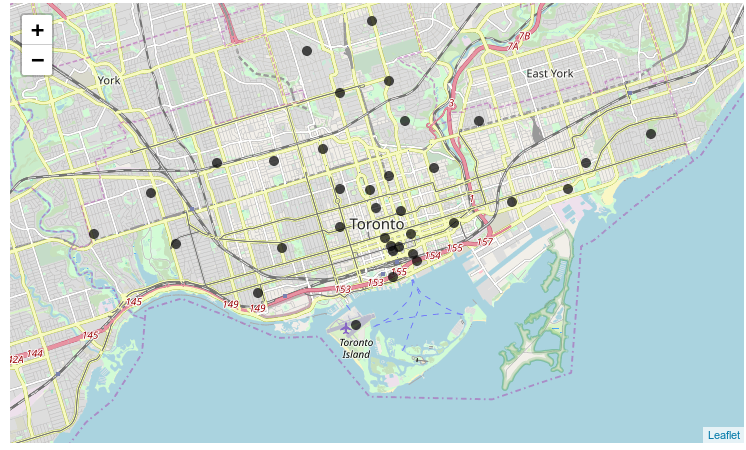

## _V. Discussion_

### The purpose of this analysis is to find out neighborhoods which satisfy Mr.X's criterias:
    -- close to grocery stores
    -- have good restaurants
    -- close to park and recreations
    
### Therefore, I will examine all clusters to find out the optimal neighborhood which satisfy as more criterias as possible.

### 5.1 Since close to grocery stores is Mr.X's first priority when choosing a residence, I will first pull out all the neighborhoods that has the 1st common venues as grocery stores.

In [53]:
gs = dtt_merged[dtt_merged['1st Most Common Venue'] == 'Grocery Store']
gs

,Postcode,Borough,Neighborhood,Postal Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,M6G,Downtown Toronto,Christie,M6G,43.669542,-79.422564,0,Grocery Store,Café,Park,Nightclub,Restaurant,Diner,Baby Store,Athletics & Sports,Italian Restaurant,Candy Store


#### As the above dataframe shows, Christie is a neighborhood in Downtown Toronto which has grocery stores as the most common venues in it.  

#### Also, the 3rd common venue is park; the 5th/ 6th /9th common venues are restaurants. 

#### Therefore, I will keep Christie in the pool for now.

### 5.2 Since there is only one neighborhood that has most common venues as grocery stores, I will pull out all the neighborhoods that has restaurants as the most common venues instead.

In [55]:
res = dtt_merged[dtt_merged['1st Most Common Venue'].str.contains('Restaurant')].reset_index(drop=True)
res

,Postcode,Borough,Neighborhood,Postal Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4K,East Toronto,"The Danforth West,Riverdale",M4K,43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store,Bubble Tea Shop,Indian Restaurant,Sports Bar,Spa,Juice Bar


#### As the above dataframe shows, The Danforth West and Riverdale are two neighborhoods in East Toronto.

#### These two neighborhoods the 1st / 4th / 7th / 8th common venues as restaurants, which is a big plus.

#### However, grocery stores may not be very easy to access in these two neighborhoods since it is not in the top 10 list.

#### Therefore, I will prefer Christie than these two neighborhoods.

### 5.3 Mr.X also prefer to take public transportation to and from work, so I will examine neighborhoods which has convinient public transportation such as light rail.

In [58]:
lr = dtt_merged[dtt_merged['1st Most Common Venue'].str.contains('Light')].reset_index(drop=True)
lr

,Postcode,Borough,Neighborhood,Postal Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern,M7Y,43.662744,-79.321558,0,Light Rail Station,Pizza Place,Smoke Shop,Brewery,Spa,Farmers Market,Fast Food Restaurant,Burrito Place,Restaurant,Recording Studio


#### As the above dataframe shows, the Business Reply Mail Processing Centre 969 in East Toronto has very convinient Light Rail access.


#### On the other hand, there are many restaurants in this area as well. Although, there are no grocery stores in the top 10 list, there are many farmers markets in this area, which could partially satisfy Mr.X's criteria for grocery shopping.

## _VI. Conclusion_

### In conclusion, there are at least two options for Mr.X:

#### 1) if Mr.X weighs the convinience to get to a grocery store near his residence, he would better choose to live in Christie in Downtown Toronto. 

#### This neighborhood has many grocery stores as well as many restaurants nearby. Also, there are many parks and recreations in this neighborhood just like what Mr.X wants.

#### 2) if Mr.X prefers to take public transportation near his residence, he may want to choose to live in the Business Reply Mail Processing Centre 969 in East Toronto. 

#### This area has many access to The Toronto Light Rail. Also, there are certain amount of restaurants in this area. On the other hand, there are farmers market, spa, and brewery nearby which would satisfy Mr.X criteria for grocery shopping and recreation.

### For the purpose of simplifying variables in this report, I did not consider other metrics, for example acceptable price range for monthly rent and crime rates for each neighborhood. These factors are often important to consider when someone relocate in real life.